<a href="https://colab.research.google.com/github/Benjamnk/-Benjamin-khoadphuwiang/blob/main/customer_segmentation_mpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")

In [ ]:
URL = 'https://raw.githubusercontent.com/wanjantp/dataset/main/CC_GENERAL.csv'

In [ ]:
df = pd.read_csv(URL)

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


In [ ]:
# 3

X = df.drop('CUST_ID', axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [ ]:
X

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

### K-Means

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.


silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.



*   1: Means clusters are well apart from each other and clearly distinguished.
*   0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
*-1: Means clusters are assigned in the wrong way.






In [ ]:
# K-Means Inertia and Silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = list()
silhouette ={}

for i in range(2,10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    
    inertia.append(k_means.inertia_)
    
    silhouette[i] = silhouette_score(X, labels=k_means.labels_ , metric="euclidean")

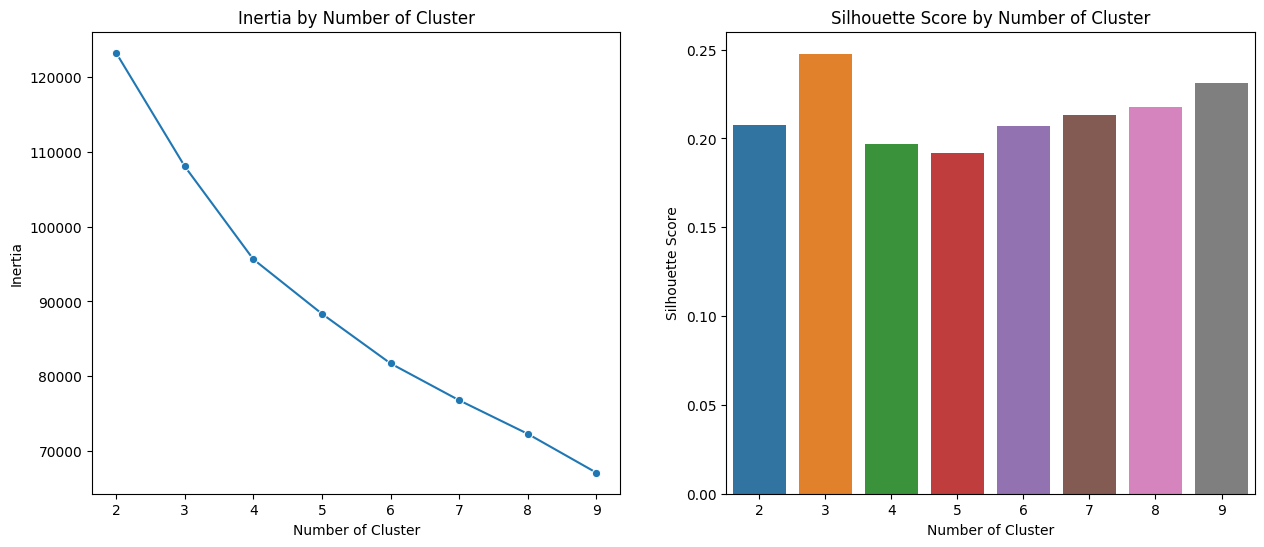

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.lineplot(x=range(2,10), y=inertia, marker="o", ax=ax[0])
ax[0].set_xlabel("Number of Cluster")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Inertia by Number of Cluster")

sns.barplot(x=list(silhouette.keys()), y=list(silhouette.values()), ax=ax[1])
ax[1].set_title("Silhouette Score by Number of Cluster")
ax[1].set_xlabel("Number of Cluster")
ax[1].set_ylabel("Silhouette Score")
plt.show()

In K=3 all the metrics indicates that it is the best clusters number

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans_labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

In [ ]:
kmeans_labels

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
centers

array([[-0.36799502, -0.16988858, -0.23380676, -0.20475071, -0.17639567,
        -0.31107795, -0.06098735, -0.23402454, -0.04934944, -0.33510304,
        -0.30056577, -0.24534232, -0.34243964, -0.28627167, -0.13653712,
         0.01534388, -0.02454561],
       [ 0.30332304,  0.41987159,  1.51168289,  1.26371701,  1.25122055,
        -0.24909419,  1.13337888,  1.53916362,  0.95735143, -0.36449691,
        -0.25460127,  1.66768723,  0.88894685,  0.82440776,  0.15794244,
         0.47229807,  0.29533849],
       [ 1.15488896,  0.31495252, -0.29474222, -0.21124605, -0.3087139 ,
         1.3704461 , -0.65319003, -0.31534774, -0.5599309 ,  1.55127545,
         1.33499315, -0.37277471,  0.60160395,  0.43955536,  0.39309574,
        -0.42630537, -0.13749073]])

In [ ]:
df["Clus_km"] = kmeans_labels

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clus_km
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [ ]:
df.groupby('Clus_km').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clus_km,,,,,,,,,,,,,,,,,
0,830.056338,0.859776,518.755077,260.078604,259.010708,334.388909,0.471505,0.135727,0.349116,0.070060,1.238038,8.855270,3268.742310,951.438925,540.330441,0.163821,11.502299
1,2236.823143,0.982236,4301.224269,2733.266623,1568.453105,465.763191,0.950768,0.667714,0.749913,0.064056,1.554088,57.023947,7774.772915,4183.209240,1239.012170,0.299224,11.921552
2,4023.495149,0.960420,386.736972,249.034343,137.782313,3903.218126,0.233844,0.111150,0.146023,0.450588,12.542526,5.646907,6726.935918,3065.132518,1797.895018,0.033030,11.353737


## Density-based spatial clustering of applications with noise (DBSCAN)

ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster

 We can find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

In [ ]:
# Lets plot the distances of each point in ascending order of the distance, 
# elbow point will give us the samller range for optimal eps value.

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nn.kneighbors(X)

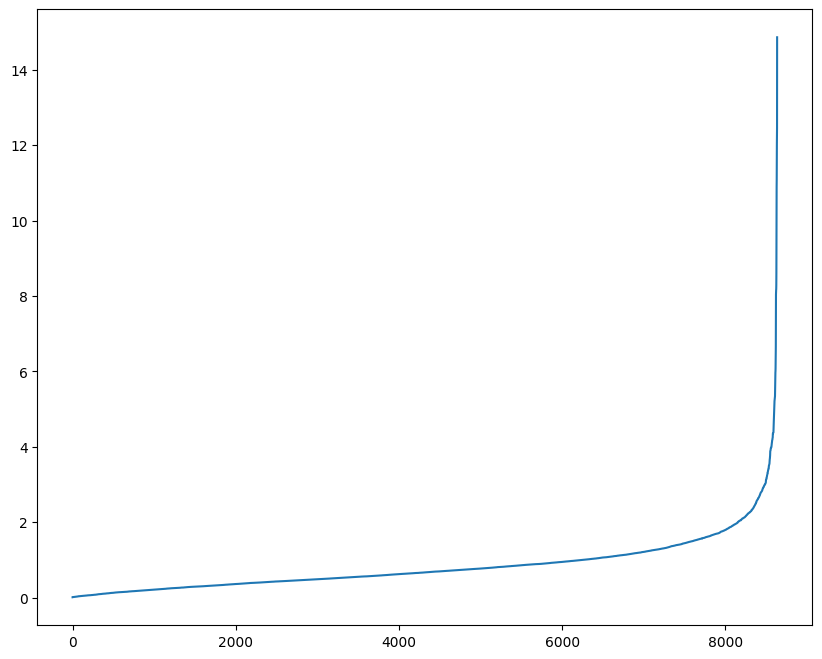

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

Lets consider eps range 2 to 14 

**Minimum Samples (“MinPts”)**
the fewest number of points required to form a cluster

There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:



1.   The larger the data set, the larger the value of MinPts should be
2.   For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
3. Generally, MinPts should be greater than or equal to the dimensionality of the data set
4. If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).






min_sample range 15 to 40 and iterate over these combinations and get the best silhouette score.

In [ ]:
min_samples = range(5,100)
eps = np.arange(2,20,1)

In [ ]:
from sklearn.cluster import DBSCAN
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = silhouette_score(X, labels)
        output.append((ms, ep, score))

ValueError: ignored

In [ ]:
# Get the parameters for best silhouette score
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.8513856586062017
min_samples: 39
eps: 13


In [ ]:
clustering = DBSCAN(eps=13, min_samples=39).fit(X)

In [ ]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 5


In [ ]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df["Clus_DBSCAN"] = clustering.labels_

In [ ]:
df.groupby("Clus_DBSCAN").mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clus_km
Clus_DBSCAN,,,,,,,,,,,,,,,,,,
-1,10102.779015,1.000000,27660.418000,21212.466000,6447.952000,9539.075729,0.883333,0.583333,0.766667,0.216667,24.800000,136.20000,17020.000000,31745.824281,20278.487698,0.266667,12.000000,1.200000
0,1596.299882,0.894974,1010.004038,592.963329,417.351986,989.225401,0.495776,0.205690,0.368590,0.137558,3.301471,14.96304,4514.850902,1767.121277,853.058168,0.159241,11.534121,0.499247


In [ ]:
th